# **Exploratory data analysis (EDA) with Pandas in Banking**

This is a guided project of Cognitive Class AI, an IBM initiative, available at: https://cognitiveclass.ai/courses/course-v1:IBM+GPXX0Q8AEN+v1 . The data used is a subset of an open source bank marketing data set from the UCI ML repository: https://archive.ics.uci.edu/ml/citation_policy.html. This dataset is publicly available for research.

The preliminary analysis is focused on the positive response (term deposit) to direct calls from a bank.  


### Libraries Import

In [1]:
# Importing data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Using a magic function
# matplotlib backend
%matplotlib inline 
plt.rcParams["figure.figsize"] = (8,6)

#Importing warnings 
import warnings 
warnings.filterwarnings('ignore')

#Showing all columns 
pd.set_option('display.max_columns', None)

#Setting the precision
pd.options.display.float_format = '{:.2f}'.format

### Dataset Exploration

In [2]:
#Load the data

df = pd.read_csv(r"C:\Users\osmar\Downloads\bank-additional\bank-additional\bank-additional-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [3]:
# Looking at the dataset size
df.shape

(41188, 21)

In [4]:
# Features name (columns)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
# Features data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

There is no need to fill the gaps because the dataset is full.

In [6]:
#Describing the main Statistical characteristics of the dataset for each numerical feature (int64 and float64 data types)

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00,41188.00
mean,40.02,258.29,2.57,962.48,0.17,0.08,93.58,-40.50,3.62,5167.04
std,10.42,259.28,2.77,186.91,0.49,1.57,0.58,4.63,1.73,72.25
min,17.00,0.00,1.00,0.00,0.00,-3.40,92.20,-50.80,0.63,4963.60
25%,32.00,102.00,1.00,999.00,0.00,-1.80,93.08,-42.70,1.34,5099.10
50%,38.00,180.00,2.00,999.00,0.00,1.10,93.75,-41.80,4.86,5191.00
75%,47.00,319.00,3.00,999.00,0.00,1.40,93.99,-36.40,4.96,5228.10
max,98.00,4918.00,56.00,999.00,7.00,1.40,94.77,-26.90,5.04,5228.10


The duration of about a quarter of calls (25%) to customers is around 2 minutes (100 seconds).

In [7]:
# Describing the non-numeric features (categories)

df.describe(include = ["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


The result shows that the average client refers to administrative staff , is married and has a university degree.

In [8]:
# Looking at the target feature (y) value counts (frecuency table)
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [9]:
#Viewing the frecuency of y as relative frecuencies intead of absolute

df['y'].value_counts(normalize=True)*100

no    88.73
yes   11.27
Name: y, dtype: float64

4640 clients (11.27%) issued a term deposit. 

In [10]:
# Looking at the client marital distribution by the variable marital

df['marital'].value_counts(normalize = True)*100

married    60.52
single     28.09
divorced   11.20
unknown     0.19
Name: marital, dtype: float64

The result shows that 61% of clients are married. Which must be taken into account when planning a marketing campaigns to manage deposit operations

In [11]:
# Sorting by duration in a descending order

df.sort_values(by = 'duration', ascending= False).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24091,33,technician,single,professional.course,no,yes,no,telephone,nov,mon,4918,1,999,0,nonexistent,-0.10,93.20,-42.00,4.41,5195.80,no
22192,52,blue-collar,married,basic.4y,no,no,no,telephone,aug,thu,4199,3,999,0,nonexistent,1.40,93.44,-36.10,4.96,5228.10,yes
40537,27,admin.,single,high.school,no,no,no,telephone,aug,fri,3785,1,999,0,nonexistent,-1.70,94.03,-38.30,0.89,4991.60,no
13820,31,technician,married,professional.course,no,no,no,cellular,jul,thu,3643,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,yes
7727,37,unemployed,married,professional.course,no,yes,no,telephone,may,fri,3631,2,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,yes


The result shows that the longest calls exceeded 1 hour. It was usually in November and August. 

In [12]:
# Sorting by the age (ascending order) and duration (descending) to see the youngest customers and their calls duration

df.sort_values(by =['age', 'duration'], ascending= [True, False]).head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38274,17,student,single,unknown,no,no,yes,cellular,oct,tue,896,1,2,2,success,-3.40,92.43,-26.90,0.74,5017.50,yes
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,aug,fri,498,2,999,1,failure,-2.90,92.20,-31.40,0.87,5076.20,yes
37140,17,student,single,unknown,no,yes,no,cellular,aug,wed,432,3,4,2,success,-2.90,92.20,-31.40,0.88,5076.20,no
37539,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,182,2,999,2,failure,-2.90,92.20,-31.40,0.87,5076.20,no
37558,17,student,single,basic.9y,no,yes,no,cellular,aug,fri,92,3,4,2,success,-2.90,92.20,-31.40,0.87,5076.20,no


The youngest customers are 17 years old, and the call duration exceeded 3 minutes only for three customers, wich indicates the ineffectiveness of long-term interaction with such clients.

In [13]:
# Looking at the maximum number of contacts with one of the customers (campain)
df.apply(np.max)

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate           1.40
cons.price.idx        94.77
cons.conf.idx        -26.90
euribor3m              5.04
nr.employed         5228.10
y                       yes
dtype: object

The number of contacts with one of the customer reached 56, adittionaly the oldest client is 98 years old. 

In [14]:
# Mapping values

d = {"no": 0, "yes":1}
df["y"] = df["y"].map(d)

In [15]:
# Looking at the share of clients attracted in our DataFrame
print("Share of attracted clients =" ,'{:.1%}'.format(df["y"].mean()) )

Share of attracted clients = 11.3%


The share of attracted clients is 11.3%

In [16]:
#Using the logical indexation to answer the question: what are the mean values of numerical features among the attracted clients? 

# y = 1 represents attracted clients, then: 

df[df["y"]== 1 ].mean()


age                40.91
duration          553.19
campaign            2.05
pdays             792.04
previous            0.49
emp.var.rate       -1.23
cons.price.idx     93.35
cons.conf.idx     -39.79
euribor3m           2.12
nr.employed      5095.12
y                   1.00
dtype: float64

The average age of the attracted clients is about 40 year, and 2 calls were required to attract them.

In [17]:
# What is the average call duration for the attracted clients?
mean_duration = round(df[df["y"]==1]["duration"].mean() , 2)
mean_duration_minutes = mean_duration//60
print("Average call duration for attracted clients =", mean_duration_minutes, "min", int(mean_duration)%60, "sec")


Average call duration for attracted clients = 9.0 min 13 sec


So, the average duration of a  successful call is nearly 10 minutes. 

In [18]:
# What is the average age of attracted clients and unmarried clients?

age_attracted_clients = int(df[(df["y"]==1 ) & (df["marital"]=="single")]["age"].mean())
age_attracted_clients
print("Average age of attracted clients = ", age_attracted_clients, "years")

Average age of attracted clients =  31 years


The average age of unmarried attracted clients is 31, which should be considered when working with such clients and marketing campaigns.

In [19]:
# Cross tabulation

#Distribution of sample in the context of two features: y and marital status

pd.crosstab(df["y"], df["marital"], normalize = 'columns')

marital,divorced,married,single,unknown
y,,,,
0,0.90,0.90,0.86,0.85
1,0.10,0.10,0.14,0.15


The result shows that the number of attracted (y = 1) married clients is 2532 (10%) from the total number.

In [20]:
# Looking at the marital status of the clients who have not issued a deposit

pd.crosstab(df["y"],
            df["marital"],
            normalize = 'index')

marital,divorced,married,single,unknown
y,,,,
0,0.11,0.61,0.27,0.00
1,0.10,0.55,0.35,0.00


61% of clients who have  not issued a deposit are married.

In [21]:
# Let's find the average age and the call duration for different types of clients employments. 

df.pivot_table(
        ["age", "duration"],
        ["job"],
        aggfunc= "mean"
).head(10)

,age,duration
job,,
admin.,38.19,254.31
blue-collar,39.56,264.54
entrepreneur,41.72,263.27
housemaid,45.50,250.45
management,42.36,257.06
retired,62.03,273.71
self-employed,39.95,264.14
services,37.93,258.40
student,25.89,283.68


The obtained results allow you to plan marketing banking campaigns more effectively.

### Data visualization

<AxesSubplot:>

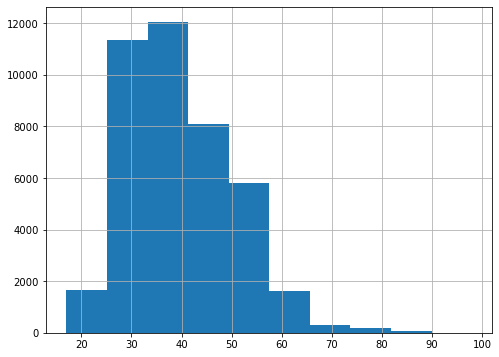

In [22]:
df["age"].hist()

The histogram shows that most of clients are between the age of 25 and 50, which corresponds to the actively working part of the population.

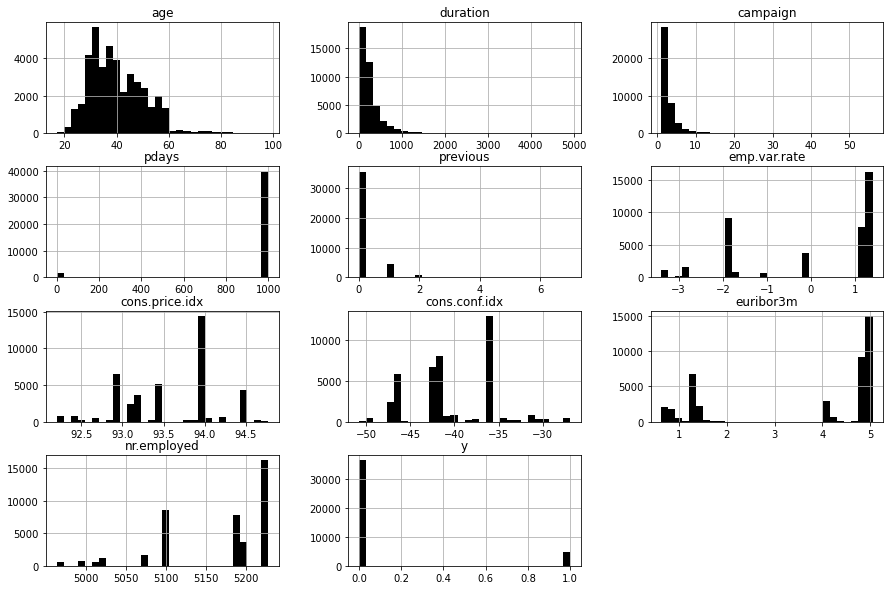

In [23]:
# Putting all together

df.hist(
        color = "k",
        bins= 30,
        figsize=(15,10)
)
plt.show()

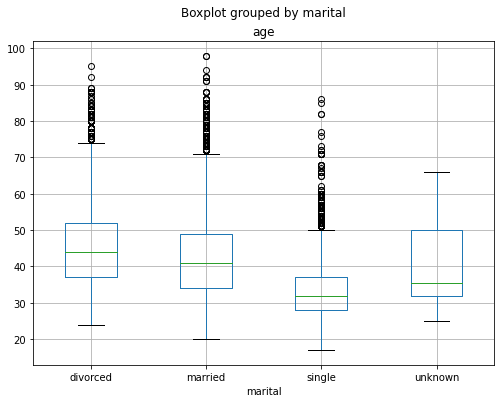

In [24]:
df.boxplot(
            column= "age",
            by = "marital"
)
plt.show()

The boxplot shows that unmarried clients are on average younger than married and divorced ones. For the divorced and married clients, there is an outlier over 70 years old, and for the single clients over 50. 

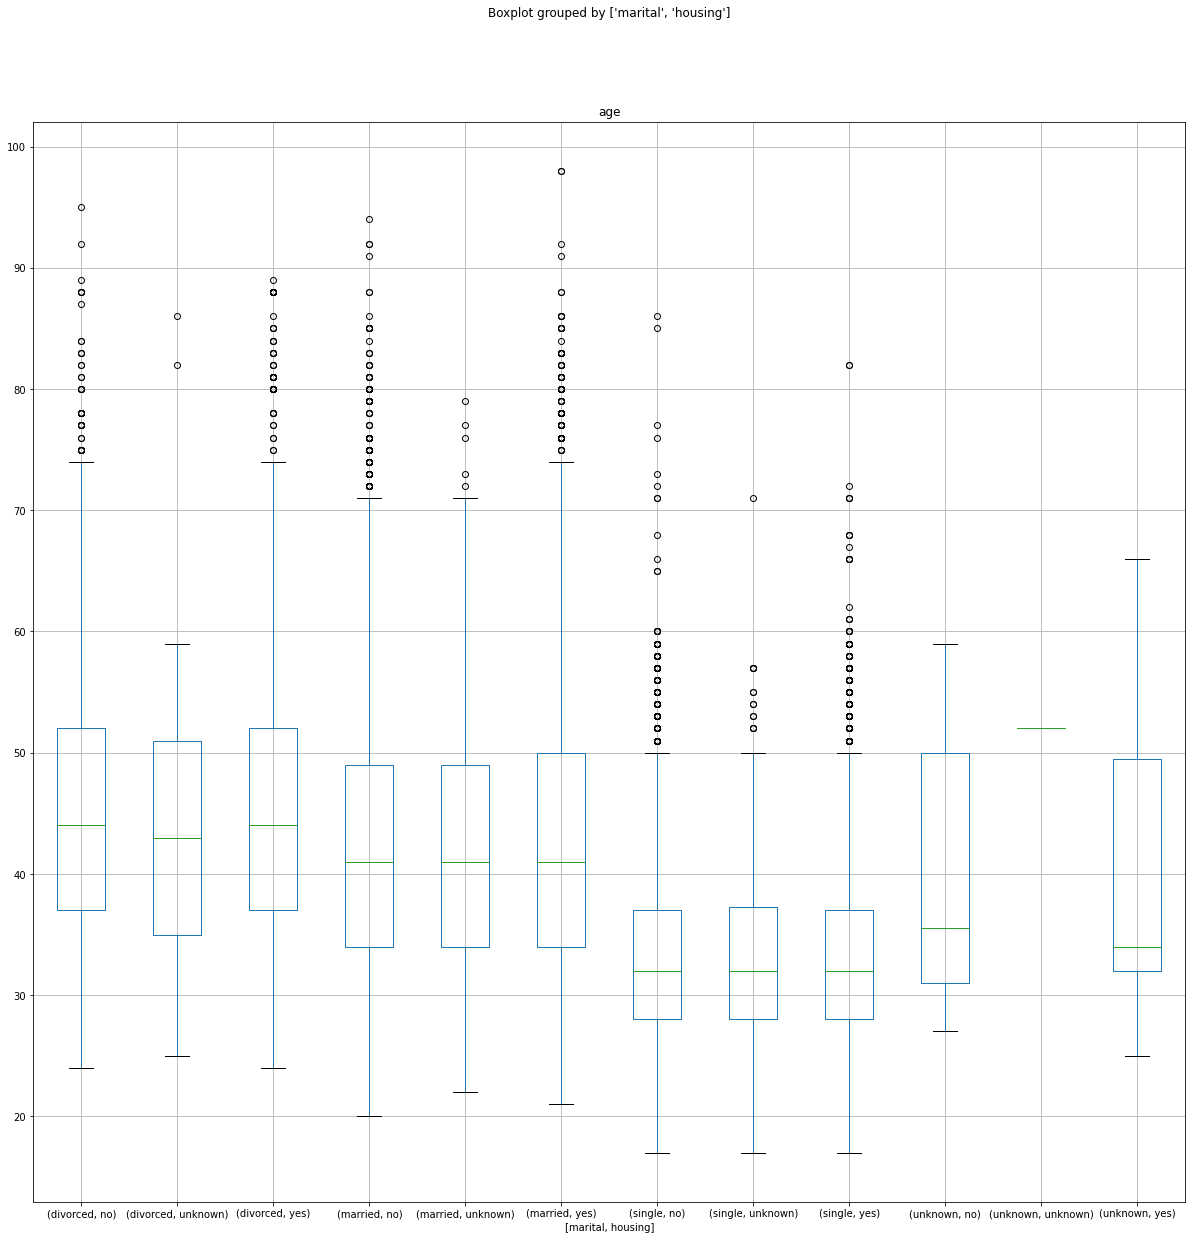

In [25]:
# Gouping the age by marital and housing

df.boxplot(
            column= "age",
            by = ["marital", "housing"],
            figsize=(20,20)
)
plt.show()

Age and marital status do not have a significant influence on having a housing load.

### Additional questions

In [26]:
# Q1 List 10 clients with the largest number of contacts

df.sort_values(by = "campaign", ascending= False).head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4107,32,admin.,married,university.degree,unknown,unknown,unknown,telephone,may,mon,261,56,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
18728,54,admin.,married,university.degree,unknown,yes,no,cellular,jul,thu,65,43,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
13447,32,technician,single,university.degree,no,yes,yes,telephone,jul,wed,16,43,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,0
4168,29,technician,married,professional.course,no,yes,no,telephone,may,mon,124,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
5304,44,retired,married,basic.9y,no,yes,no,telephone,may,fri,147,42,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11033,38,blue-collar,married,basic.4y,no,yes,no,telephone,jun,wed,25,41,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
18754,36,admin.,single,university.degree,no,no,no,cellular,jul,thu,18,40,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,0
11769,56,self-employed,married,professional.course,no,no,yes,telephone,jun,fri,13,40,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0
4114,52,entrepreneur,married,university.degree,no,no,no,telephone,may,mon,44,39,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,0
11593,43,technician,married,high.school,no,yes,no,telephone,jun,fri,17,37,999,0,nonexistent,1.40,94.47,-41.80,4.96,5228.10,0


In [27]:
# Q2 Determine the average age and the number of contacts for different levels of client education
df.pivot_table(
    ["age", "campaign"],
    ["education"],
    aggfunc=["mean", "count"]

)

mean           count         
                      age campaign    age campaign
education                                         
basic.4y            47.60     2.60   4176     4176
basic.6y            40.45     2.56   2292     2292
basic.9y            39.06     2.53   6045     6045
high.school         38.00     2.57   9515     9515
illiterate          48.50     2.28     18       18
professional.course 40.08     2.59   5243     5243
university.degree   38.88     2.56  12168    12168
unknown             43.48     2.60   1731     1731

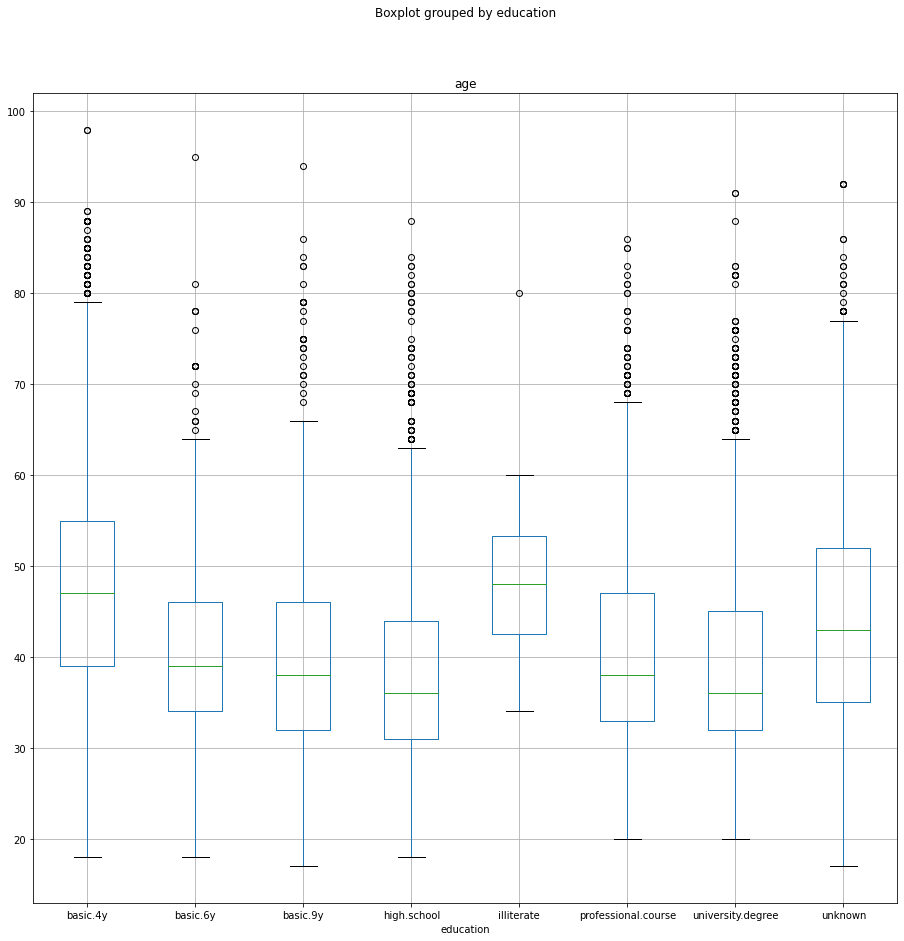

In [28]:
# Q3 Client age distribution by their education level

df.boxplot(
            column = "age",
            by = "education",
            figsize= (15,15)
            )
plt.show()

## Conclusions

1. The duration of about a quarter of calls (25%) to customers is around 2 minutes.
2. The average client refers to administrative staff, is married, and has a university degree.
3. 4640 clients (11.27%) issued a term deposit. 
4. 61% of clients who have not issued a deposit are married. Which must be taken into account when planning marketing campaigns.
5. The longest calls exceeded 1 hour. It was usually in November and August. Take into account when planning a marketing campaign.
6. The youngest customers are 17 years old, and the call duration exceeded 3 minutes only for three customers, which could indicate the ineffectiveness of long-term interaction with such clients.
7. The number of contacts with one of the customers reached 56 (investigate the reason).
8. The share of attracted clients is 11.3%.
9. The average age of the attracted clients is about 40 years, and 2 calls were required to attract them.
10. The average duration of a successful call is nearly 10 minutes. 
11. The average age of unmarried attracted clients is 31, which should be considered when working with such clients and marketing campaigns.
12. The number of attracted (y = 1) married clients is 2532 (10%) of the total number.
13. Most clients are between the age of 25 and 50, which corresponds to the actively working part of the population.
14. Age and marital status do not have a significant influence on having a housing loan. 